In [695]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [696]:
scaler = preprocessing.MinMaxScaler()


## Helper Functions

In [697]:
def relu(Z):
        return np.maximum(0, Z)

def dRelu(x):
        x[x <= 0] = 0
        x[x > 0] = 1
        return x

def sigmoid(Z):
        return 1 / (1 + np.exp(-Z))

def eta(x):
    return np.maximum(x, 0.0000000001)


In [698]:
class NeuralNetwork():

    def __init__(self, layers=[13, 8, 1], learning_rate=7e-5, iterations=1000):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.accuracy = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None

    def initialize_weights(self):
        np.random.seed(1)
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1])
        self.params["b1"] = np.random.randn(self.layers[1],)
        self.params["W2"] = np.random.randn(self.layers[1], self.layers[2])
        self.params["b2"] = np.random.randn(self.layers[2])

    def entropy_loss(self, y, y_pred):
        y_pred_inv = eta(1 - y_pred)
        y_inv =  eta(1 - y)
        loss = -np.average(y*np.log(y_pred) +
                           y_inv * np.log(y_pred_inv))
        return loss

    def forward_prop(self):
        Z1 = self.X@(self.params['W1']) + self.params['b1']
        A1 = relu(Z1)
        Z2 = A1@(self.params['W2']) + self.params['b2']
        y_pred = sigmoid(Z2)
        loss = self.entropy_loss(self.y, y_pred)
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1
        return y_pred, loss

    def backward_prop(self, y_pred):
        y_inv = 1 - self.y
        y_pred_inv = eta(1 - y_pred)
        dl_wrt_pred = (y_inv/
            y_pred_inv) - (self.y/y_pred)
        dl_wrt_sig = y_pred * (y_pred_inv)
        dl_wrt_z2 = dl_wrt_pred * dl_wrt_sig
        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0 )
        dl_wrt_z1 = dl_wrt_A1 * dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0,)
        self.updater(dl_wrt_w1,dl_wrt_w2,dl_wrt_b1,dl_wrt_b2)


    def fit(self, X, y):
        self.X = X
        self.y = y
        self.initialize_weights()
        for _ in range(self.iterations):
            y_pred, loss = self.forward_prop()
            curr_acc = self.acc(y, y_pred);
            if _ % 10 == 0:
                print("Iteration:",_, " Accuracy:",curr_acc, " Loss:",loss)
            self.backward_prop(y_pred)
            self.loss.append(loss)
            self.accuracy.append(self.acc(y, y_pred))

    def predict(self, X):
        Z1 = X@(self.params['W1']) + self.params['b1']
        A1 = relu(Z1)
        Z2 = A1@(self.params['W2']) + self.params['b2']
        pred = sigmoid(Z2)
        return np.round(pred)

    def acc(self, y, y_pred):
        predictions = (y_pred > 0.5).astype(np.int8)
        return float(np.sum(y == predictions)/len(y))

    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training Loss")
        plt.show()

    def plot_acc(self):
        plt.plot(self.accuracy, label="Accuracy")
        plt.plot(self.loss, label="Loss")
        plt.ylim((0, 1))
        plt.legend()
        plt.show()
    
    def updater(self,w1,w2,b1,b2):
        self.params['W1'] = self.params['W1'] - self.learning_rate * w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * b2


In [699]:
df = pd.read_csv("heart_disease.csv")
X_df = df.drop(["condition"], axis=1)
X_pre = scaler.fit_transform(X_df)
X = pd.DataFrame(X_pre, columns=df.columns[:-1])
y = df["condition"].values.reshape(X.shape[0], 1)


In [700]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)


In [701]:
NN = NeuralNetwork(learning_rate=0.001, iterations=1000,layers=[13,12,1])
NN.fit(X_train, y_train)


(237, 12)
(237, 12)
Iteration: 0  Accuracy: 0.5189873417721519  Loss: 1.1054201598095954
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
Iteration: 10  Accuracy: 0.6666666666666666  Loss: 0.6475734456021431
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
Iteration: 20  Accuracy: 0.7088607594936709  Loss: 0.5712666490341547
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
Iteration: 30  Accuracy: 0.7637130801687764  Loss: 0.5298196081606725
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(237, 12)
(

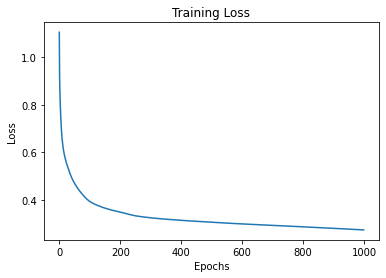

In [702]:
NN.plot_loss()

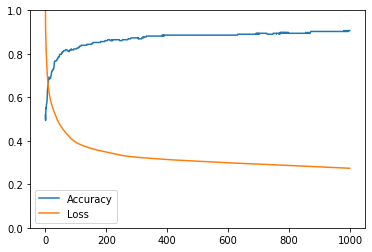

In [703]:
NN.plot_acc()

In [704]:
train_pred = NN.predict(X_train)
test_pred = NN.predict(X_test)


## Test Accuracy

In [705]:
NN.acc(test_pred,y_test)

0.8666666666666667

## Train Accuracy

In [706]:
NN.acc(train_pred,y_train)

0.9071729957805907

<AxesSubplot:>

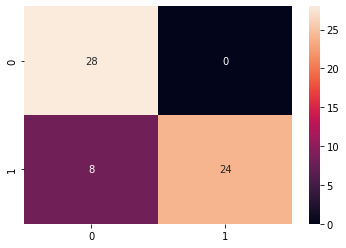

In [707]:

sns.heatmap(confusion_matrix(y_test, test_pred), annot=True)


## Standard Library

In [708]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier


In [709]:
sknet = MLPClassifier(hidden_layer_sizes=3,
                      learning_rate_init=0.001, max_iter=1000)
sknet.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=3, max_iter=1000)

In [710]:
preds_train = sknet.predict(X_train)
preds_test = sknet.predict(X_test)

print("Train accuracy {}".format(
    round(accuracy_score(preds_train, y_train), 2)))
print("Test accuracy  {}".format(
    round(accuracy_score(preds_test, y_test), 2)))


Train accuracy 0.86
Test accuracy  0.82


<AxesSubplot:>

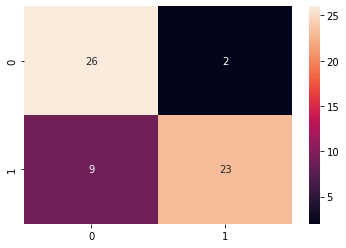

In [711]:

sns.heatmap(confusion_matrix(y_test, preds_test), annot=True)
